<a href="https://colab.research.google.com/github/Prerna99-star/Google-Stock-Price-Predictor-Model/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recurrent Nueral Network**

# Data Processing

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

*Importing Dataset*

In [17]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


*Feature Scaling*

In [18]:
from sklearn.preprocessing import MinMaxScaler 
Sc = MinMaxScaler(feature_range = (0,1))
trainingset_scaled = Sc.fit_transform(training_set)
print(trainingset_scaled) 

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


*Creating a data structure with 60 timesteps and 1 output*

In [19]:
X_train =[]
y_train = []
for i in range(60,1258):
  X_train.append(trainingset_scaled[i-60:i, 0])
  y_train.append(trainingset_scaled[i, 0])
X_train, y_train = np.array(X_train),np.array(y_train)
print(X_train)
 

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [20]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


*Reshaping*

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


# Building RNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

*Initializing RNN*

In [0]:
regressor = Sequential()

*Adding the first LSTM layers and some dropout regularization*    
why dropout? -> to avoid overfitting

In [0]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1) ))
regressor.add(Dropout(0.2))

*Adding the second LSTM layers and some dropout regularization*  

In [0]:
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

*Adding the third LSTM layers and some dropout regularization*

In [0]:
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

*Adding the fourth LSTM layers and some dropout regularization*

In [0]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

*Adding the Output layer*

In [0]:
regressor.add(Dense(units = 1))

*Compiling the RNN*

In [0]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

*Fitting the RNN to the training set*

In [31]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0326
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0056
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

# Making the predictions and visualizing the result 

*Getting the real google stock price in 2017*

In [33]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


*Getting the predicted Stock price in 2017*

In [36]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 :].values
inputs = inputs.reshape(-1,1)
inputs = Sc.transform(inputs)
X_test =[]
for i in range(60,80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = Sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[773.3748 ]
 [770.9596 ]
 [770.76605]
 [771.6853 ]
 [774.45233]
 [779.6557 ]
 [784.96295]
 [787.90076]
 [789.0147 ]
 [789.15546]
 [788.87775]
 [788.35876]
 [787.8366 ]
 [787.93945]
 [788.5663 ]
 [792.3464 ]
 [798.5067 ]
 [805.64777]
 [810.39526]
 [808.26587]]


# Visualizing the final result

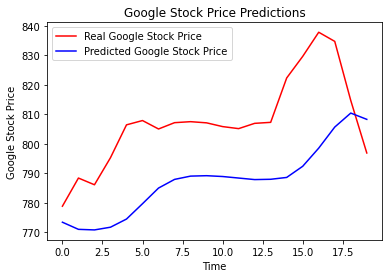

In [37]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Predictions')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()